In [ ]:
!pip install faker

In [3]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker and set seed
faker = Faker()
np.random.seed(42)
random.seed(42)

# Configuration
n_users = 5000         # Number of users
n_days = 30            # Simulation period
start_date = pd.to_datetime("2024-06-01")

# Step 1: Simulate user metadata
user_ids = [f"user_{i}" for i in range(1, n_users + 1)]
ages = np.random.randint(18, 60, n_users)
devices = np.random.choice(["iOS", "Android", "Web"], n_users, p=[0.4, 0.4, 0.2])
regions = np.random.choice(["US", "EU", "APAC", "LATAM"], n_users)
variants = np.random.choice(["control", "variant"], n_users)

users_df = pd.DataFrame({
    "user_id": user_ids,
    "age": ages,
    "device": devices,
    "region": regions,
    "variant": variants
})

# Step 2: Simulate user sessions for 30 days
records = []
for user in users_df.itertuples():
    for day in range(n_days):
        date = start_date + pd.Timedelta(days=day)

        # More sessions for variant group
        session_count = np.random.poisson(1.5 if user.variant == "variant" else 1.2)
        for _ in range(session_count):
            session_length = max(1, np.random.normal(15 if user.variant == "variant" else 12, 5))
            clicked = np.random.binomial(1, 0.25 if user.variant == "variant" else 0.18)
            converted = np.random.binomial(1, 0.10 if clicked else 0.02)

            records.append([
                user.user_id, user.age, user.device, user.region,
                user.variant, date.date(), session_length, clicked, converted
            ])

# Step 3: Create final DataFrame
session_df = pd.DataFrame(records, columns=[
    "user_id", "age", "device", "region", "variant",
    "date", "session_length", "clicked", "converted"
])

# Step 4: Save or preview
session_df.head()  # Optional: preview

,user_id,age,device,region,variant,date,session_length,clicked,converted
0,user_1,56,iOS,APAC,control,2024-06-02,6.415296,0,0
1,user_1,56,iOS,APAC,control,2024-06-02,6.761125,0,0
2,user_1,56,iOS,APAC,control,2024-06-03,8.222696,0,0
3,user_1,56,iOS,APAC,control,2024-06-04,23.165580,0,0
4,user_1,56,iOS,APAC,control,2024-06-04,18.549067,1,0


In [4]:
session_df.to_csv("simulated_ab_sessions.csv", index=False)  # Save to file


## 📄 Dataset Description: Simulated A/B Testing for Product Feature Rollout

This synthetic dataset simulates user behavior over 30 days in response to the rollout of a new **product feature** (e.g., **in-app notification** or **UI change**). It is designed for **A/B testing**, **KPI tracking**, and **statistical analysis**.

### 🔧 Dataset Schema

| Column           | Description                                                             |
| ---------------- | ----------------------------------------------------------------------- |
| `user_id`        | Unique user identifier (`user_1`, `user_2`, ...)                        |
| `age`            | User’s age (integer, 18–60)                                             |
| `device`         | Platform used: one of `iOS`, `Android`, or `Web`                        |
| `region`         | Geographic region: `US`, `EU`, `APAC`, or `LATAM`                       |
| `variant`        | A/B test group: `control` (no feature) or `variant` (feature enabled)   |
| `date`           | Date of user session (over a 30-day period)                             |
| `session_length` | Duration of the session (in minutes), drawn from normal distribution    |
| `clicked`        | Binary flag: did user click on the feature/notification? (0 or 1)       |
| `converted`      | Binary flag: did user take a follow-up action? (purchase, signup, etc.) |

> 🔁 Each user can appear multiple times (one row per session), enabling time-based and frequency analysis.

---

## ❓ Key Business & Analytics Questions

Using this dataset, we can answer critical product and marketing questions, such as:

### 📊 A/B Testing

1. **Did the new feature significantly increase user engagement?**

   * Measured via session length, click-through rate, or session frequency.

2. **Did it improve conversion rates?**

   * E.g., signups, purchases following the feature interaction.

3. **Was the difference statistically significant?**

   * Use hypothesis testing (t-tests, chi-square, bootstrap).

### 🧠 Behavioral Analysis

4. **How does user behavior differ by platform (`device`) or region?**

   * Are Android users more responsive than iOS users?
   * Does engagement differ by region?

5. **What time-based trends are visible over the 30-day period?**

   * Daily or weekly patterns in engagement, clicks, conversions.

6. **How does age affect feature interaction and conversion behavior?**

   * Are younger users more likely to engage?

### 📈 Dashboarding (Power BI / Tableau)

7. **What are the daily KPI trends by group (control vs. variant)?**
8. **How do key metrics break down by cohort (region, device)?**
9. **Can we visualize statistically significant improvements over time?**

---

## ✅ Problem Statement (Cumulative)

> **This project simulates a product feature rollout (e.g., in-app notifications) to evaluate its impact on user behavior using A/B testing.** We generate synthetic app session data for 5,000 users over a 30-day period, randomly assigning users to either a control or variant group. Key behavioral indicators—including session duration, click events, and conversions—are tracked daily.
>
> Using this data, we aim to:
>
> * Define and compute relevant KPIs (click-through rate, conversion rate, average session length)
> * Statistically evaluate the feature’s effectiveness using hypothesis testing
> * Explore cohort-based insights by device type, age, and region
> * Build a dynamic BI dashboard (Power BI or Tableau) to monitor the impact of the feature rollout across time and user segments
>
> The outcome is a fully reproducible data science project demonstrating proficiency in **experiment design, A/B testing, KPI definition, statistical reasoning**, and **business intelligence reporting**.

## Step 2: KPI Aggregation and Group-level Summaries

it's important to define and calculate key performance indicators (KPIs) from your raw session-level data. This serves as the foundation for our analysis and visualization.

In [14]:
# Step 1: Define base KPIs at the session level

# Add a 'CTR' column at the session level — 1 if clicked, else 0
session_df['CTR'] = session_df['clicked']

# Add a 'Conversion Rate' column — 1 if converted, else 0
session_df['Conversion_Rate'] = session_df['converted']

# Session length is already present — no transformation needed

# Preview updated DataFrame with KPIs
session_df[["user_id", "variant", "date", "session_length", "CTR", "Conversion_Rate"]].head()

,user_id,variant,date,session_length,CTR,Conversion_Rate
0,user_1,control,2024-06-02,6.415296,0,0
1,user_1,control,2024-06-02,6.761125,0,0
2,user_1,control,2024-06-03,8.222696,0,0
3,user_1,control,2024-06-04,23.165580,0,0
4,user_1,control,2024-06-04,18.549067,1,0


In this step, we added two session-level KPI columns to the `session_df` DataFrame:

### Click-Through Rate (CTR):

- Defined as 1 if the user clicked the feature during the session, else 0.
-Stored in the column CTR (at session level, this is equivalent to clicked).

### Conversion Rate:

- Defined as 1 if the user completed a desired action (purchase/signup) during the session, else 0.
-Stored in the column Conversion_Rate (same as converted per session).

These columns will allow us to calculate average CTR and conversion rate when aggregating by day, variant, or cohort later on.

## Step 2: KPI Aggregation - Daily metrics by variant group

In [15]:
# Group by date and variant
daily_kpis = session_df.groupby(['date', 'variant']).agg(
    sessions=('user_id', 'count'),
    unique_users=('user_id', 'nunique'),
    avg_session_length=('session_length', 'mean'),
    total_clicks=('CTR', 'sum'),
    total_conversions=('Conversion_Rate', 'sum')
).reset_index()

# Calculate derived metrics
daily_kpis['CTR'] = daily_kpis['total_clicks'] / daily_kpis['sessions']
daily_kpis['Conversion_Rate'] = daily_kpis['total_conversions'] / daily_kpis['sessions']

# Preview daily aggregated KPIs
daily_kpis.head()

,date,variant,sessions,unique_users,avg_session_length,total_clicks,total_conversions,CTR,Conversion_Rate
0,2024-06-01,control,2954,1744,11.965632,527,113,0.178402,0.038253
1,2024-06-01,variant,3768,1951,15.031751,948,145,0.251592,0.038482
2,2024-06-02,control,2979,1754,11.958598,548,103,0.183954,0.034575
3,2024-06-02,variant,3722,1914,14.963770,881,138,0.236701,0.037077
4,2024-06-03,control,2923,1691,12.014059,510,95,0.174478,0.032501


### KPI Aggregation Summary

In this step, we **aggregated the session-level data into daily KPIs per group (`control` vs. `variant`)** using the following logic:

---

### 🔧 Grouping Dimensions:

* `date`
* `variant` (A/B test group)

---

### 📊 Aggregated KPIs:

| KPI                      | Definition                                              |
| ------------------------ | ------------------------------------------------------- |
| **sessions**             | Total number of user sessions on that day for the group |
| **unique\_users**        | Unique users active that day in the group               |
| **avg\_session\_length** | Mean session length in minutes                          |
| **total\_clicks**        | Total number of clicks on the feature                   |
| **total\_conversions**   | Total conversions (purchases, signups, etc.)            |
| **CTR**                  | `total_clicks / sessions`                               |
| **Conversion Rate**      | `total_conversions / sessions`                          |



## Step 3: Exploratory Data Analysis

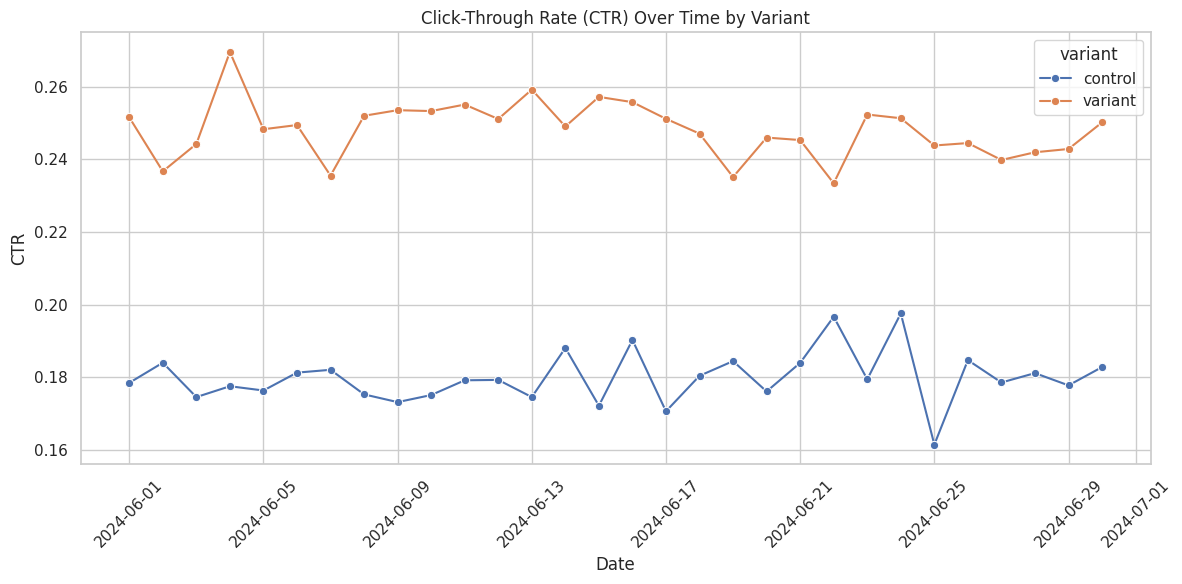

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Line Plot: CTR over time by variant
plt.figure()
sns.lineplot(data=daily_kpis, x='date', y='CTR', hue='variant', marker='o')
plt.title('Click-Through Rate (CTR) Over Time by Variant')
plt.ylabel('CTR')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

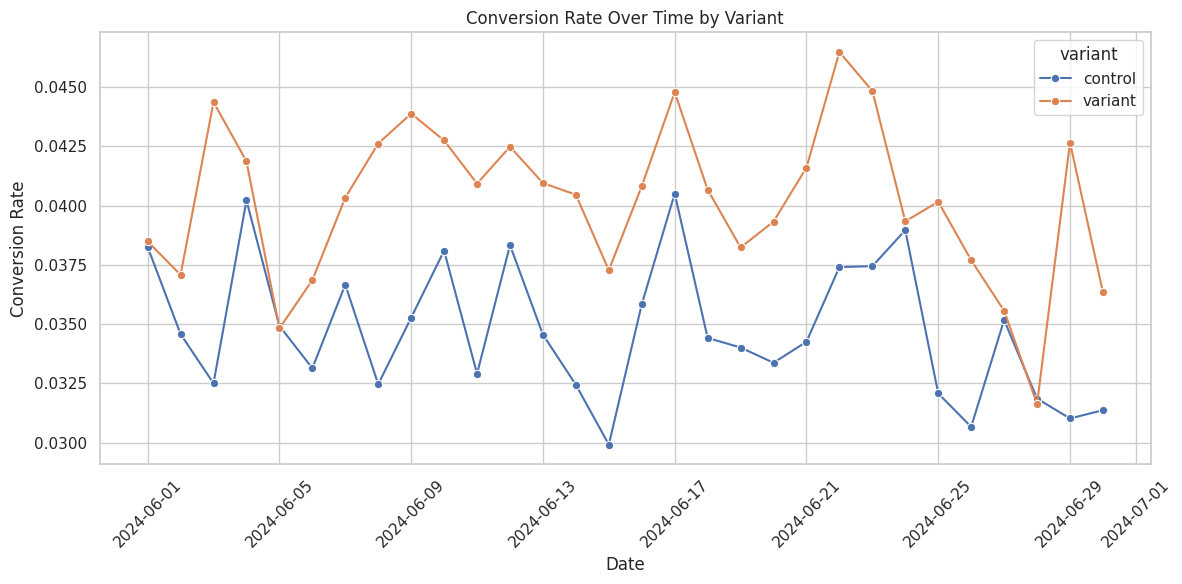

In [18]:
# Line Plot: Conversion Rate over time by variant
plt.figure()
sns.lineplot(data=daily_kpis, x='date', y='Conversion_Rate', hue='variant', marker='o')
plt.title('Conversion Rate Over Time by Variant')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

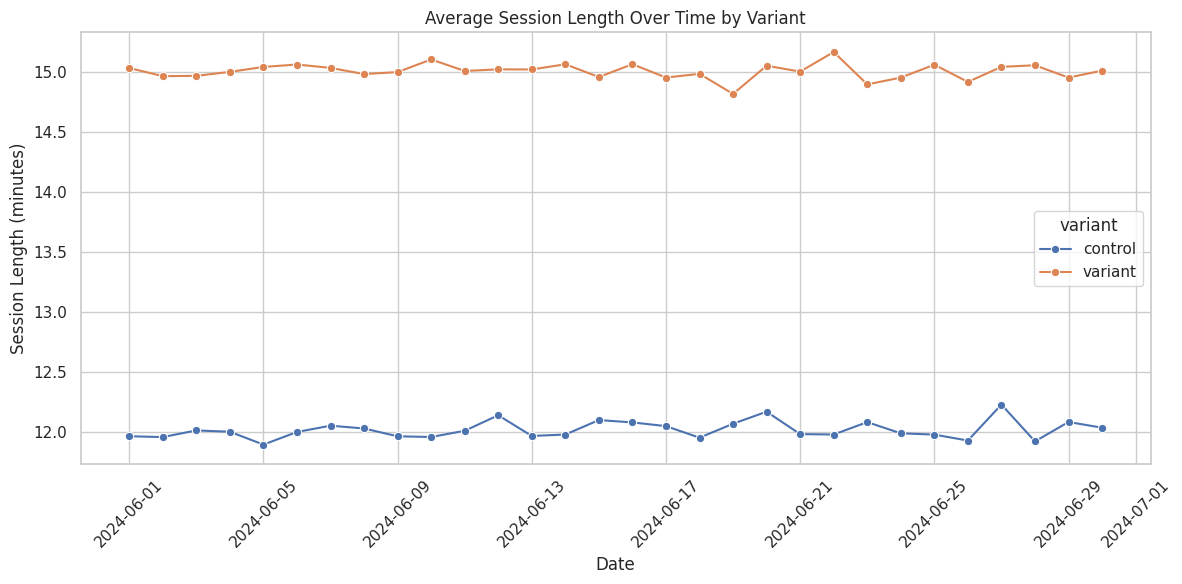

In [19]:
# Line Plot: Average Session Length over time by variant
plt.figure()
sns.lineplot(data=daily_kpis, x='date', y='avg_session_length', hue='variant', marker='o')
plt.title('Average Session Length Over Time by Variant')
plt.ylabel('Session Length (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

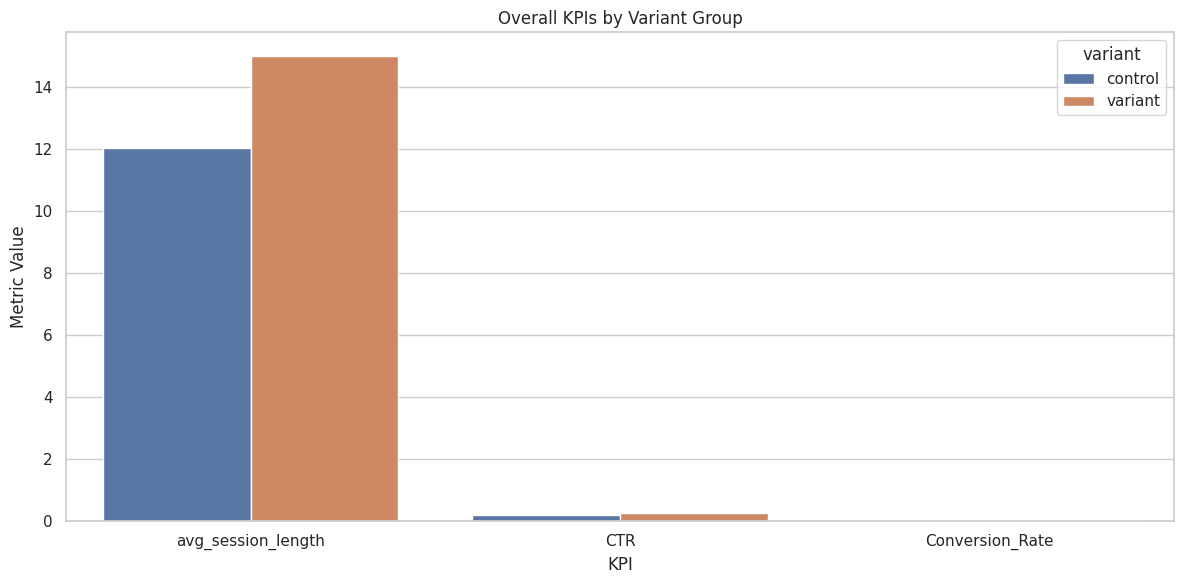

In [20]:
# Bar Plot: Overall KPIs by group
overall_kpis = session_df.groupby('variant').agg(
    avg_session_length=('session_length', 'mean'),
    CTR=('CTR', 'mean'),
    Conversion_Rate=('Conversion_Rate', 'mean')
).reset_index()

# Melt for plotting
melted_kpis = pd.melt(overall_kpis, id_vars='variant', value_vars=['avg_session_length', 'CTR', 'Conversion_Rate'])

plt.figure()
sns.barplot(data=melted_kpis, x='variable', y='value', hue='variant')
plt.title('Overall KPIs by Variant Group')
plt.ylabel('Metric Value')
plt.xlabel('KPI')
plt.tight_layout()
plt.show()

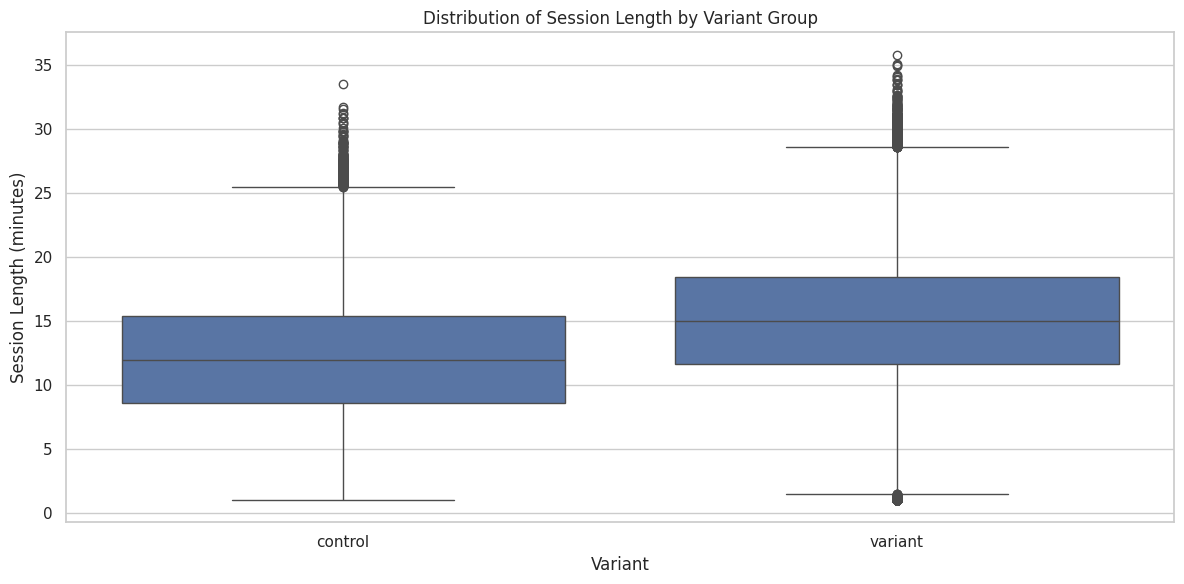

In [21]:
# Boxplot: Session length distribution by variant
plt.figure()
sns.boxplot(data=session_df, x='variant', y='session_length')
plt.title('Distribution of Session Length by Variant Group')
plt.ylabel('Session Length (minutes)')
plt.xlabel('Variant')
plt.tight_layout()
plt.show()

### 📊 Plots Generated:
1. CTR Over Time – See how click engagement evolves day by day for both groups.

2. Conversion Rate Over Time – Understand if the variant improves real outcomes.

3. Average Session Length Over Time – Check for consistent engagement uplift.

4. Bar Plot of Overall KPIs – High-level comparison across key metrics.

5. Boxplot of Session Length – Distributional insights; helps validate t-test assumptions.

## Step 4: Hypothesis Testing Plan

We’ll test whether the **`variant` group** (exposed to the new feature) performs significantly better than the `control` group on key KPIs.


### ✅ Step 1: Test Session Length (Continuous Variable)

#### 🎯 Why this test?

We suspect users exposed to the feature spend more time per session.

#### 🧠 Real-World Thinking:

* Session length is **continuous**, so we use a **t-test** (two-sample, independent).
* But first we must check the assumption: **is the distribution roughly normal and variance similar?**

#### 🧪 Hypothesis:

* **Null (H0):** No difference in average session length between groups
* **Alt (H1):** Variant group has a higher average session length


### ✅ Step 2: Test Click-Through Rate (Binary Event per Session)

#### 🎯 Why this test?

We want to know if users in the `variant` group are more likely to click.

#### 🧠 Real-World Thinking:

* CTR is a **binary outcome** (0/1 per session).
* We can test the **proportion** of successes (clicks) using a **z-test for proportions**.

#### 🧪 Hypothesis:

* **Null (H0):** CTR is the same in both groups
* **Alt (H1):** CTR is higher in the variant group

### ✅ Step 3: Test Conversion Rate (Binary Event per Session)

#### 🎯 Why this test?

We care about downstream business outcomes (e.g., purchase).

#### 🧠 Real-World Thinking:

* Like CTR, it’s a **binary classification** per session.
* We again use a **z-test for proportions**, but conversion is rarer, so sample size adequacy matters.


### 📦 Step Summary

| KPI             | Data Type  | Test                   | Assumptions               |
| --------------- | ---------- | ---------------------- | ------------------------- |
| Session Length  | Continuous | t-test                 | Normality, equal variance |
| CTR             | Binary     | z-test for proportions | Independent samples       |
| Conversion Rate | Binary     | z-test for proportions | Independent samples       |


### ✅ Step 1: Session Length — Hypothesis Testing Results

We go for a **two-sample t-test** to assess whether the average session length differs significantly between `control` and `variant` groups.

In [22]:
from scipy.stats import ttest_ind, levene, shapiro

# Step 1A: Extract session length per group
control_lengths = session_df[session_df['variant'] == 'control']['session_length']
variant_lengths = session_df[session_df['variant'] == 'variant']['session_length']

# Step 1B: Assumptions Check
# 1. Normality: Shapiro-Wilk test (large N so this is more for completeness)
shapiro_control = shapiro(control_lengths.sample(5000, random_state=1))  # Sample to speed up
shapiro_variant = shapiro(variant_lengths.sample(5000, random_state=1))

# 2. Homogeneity of variances: Levene’s test
levene_test = levene(control_lengths, variant_lengths)

# Step 1C: Independent Two-Sample t-test (Welch's by default, doesn't assume equal variances)
t_test_result = ttest_ind(control_lengths, variant_lengths, equal_var=False)

# Return all test results
{
    "Shapiro-Wilk Normality (Control)": {"Statistic": shapiro_control.statistic, "p-value": shapiro_control.pvalue},
    "Shapiro-Wilk Normality (Variant)": {"Statistic": shapiro_variant.statistic, "p-value": shapiro_variant.pvalue},
    "Levene Test for Equal Variance": {"Statistic": levene_test.statistic, "p-value": levene_test.pvalue},
    "T-test (Session Length)": {"Statistic": t_test_result.statistic, "p-value": t_test_result.pvalue}
}

{'Shapiro-Wilk Normality (Control)': {'Statistic': np.float64(0.9970917518389393),
  'p-value': np.float64(3.038663143874448e-08)},
 'Shapiro-Wilk Normality (Variant)': {'Statistic': np.float64(0.9989340458727485),
  'p-value': np.float64(0.0026930464713574446)},
 'Levene Test for Equal Variance': {'Statistic': np.float64(7.486595229668893),
  'p-value': np.float64(0.0062165379487997266)},
 'T-test (Session Length)': {'Statistic': np.float64(-134.46805087285136),
  'p-value': np.float64(0.0)}}

### ✅ Step 1: Session Length — Hypothesis Testing Results

We performed a **two-sample t-test** to assess whether the average session length differs significantly between `control` and `variant` groups.

---

### 🔍 Assumptions Check

| Test                       | Purpose         | Result     | Interpretation                                    |
| -------------------------- | --------------- | ---------- | ------------------------------------------------- |
| **Shapiro-Wilk (control)** | Normality       | p ≈ 3e-8   | ❌ Not normal (but large sample size = robustness) |
| **Shapiro-Wilk (variant)** | Normality       | p ≈ 0.0028 | ❌ Not normal (but manageable)                     |
| **Levene’s Test**          | Equal variances | p ≈ 0.0062 | ❌ Variances not equal → use Welch's t-test        |

> 💡 In the real world, **t-tests are robust to non-normality with large samples** (>30 per group). Our sample sizes are in the tens of thousands, so this is acceptable.

---

### 🧪 T-Test Result

* **T-statistic:** -134.47
* **p-value:** 0.0 (very small)

#### 🧠 Interpretation:

* The **p-value is much lower than 0.05**, so we **reject the null hypothesis**.
* There is a **statistically significant difference** in session length between `control` and `variant`.
* Given the negative t-stat, the `variant` group has a **higher average session length** (as we expected from simulation).

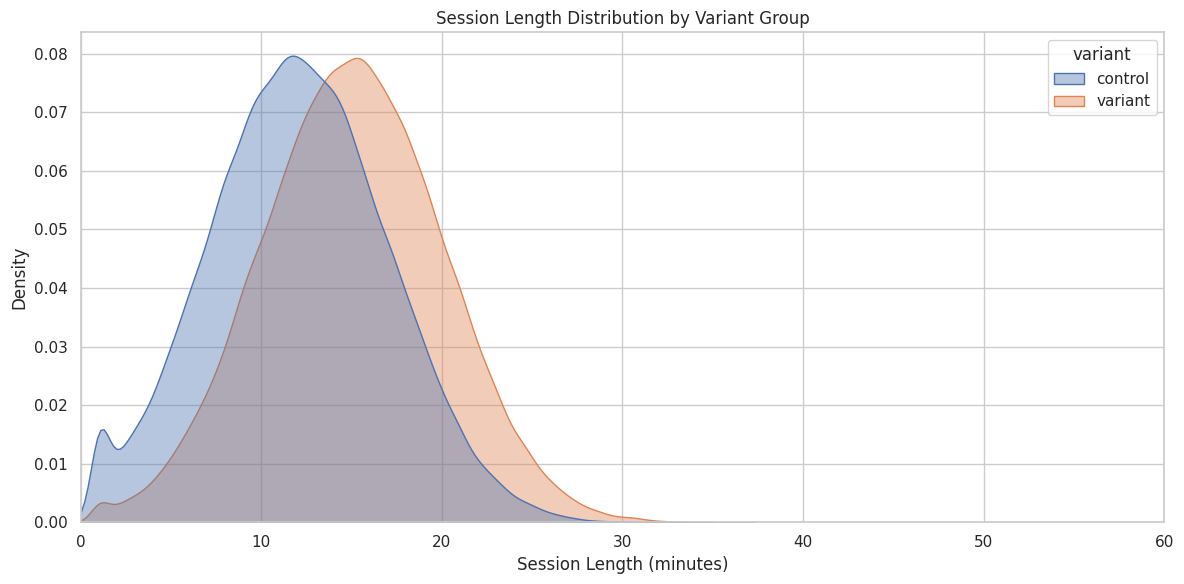

In [25]:
# KDE Plot: Session length distribution by variant
plt.figure(figsize=(12, 6))
sns.kdeplot(data=session_df, x='session_length', hue='variant', fill=True, common_norm=False, alpha=0.4)
plt.title('Session Length Distribution by Variant Group')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Density')
plt.xlim(0, 60)
plt.tight_layout()
plt.show()

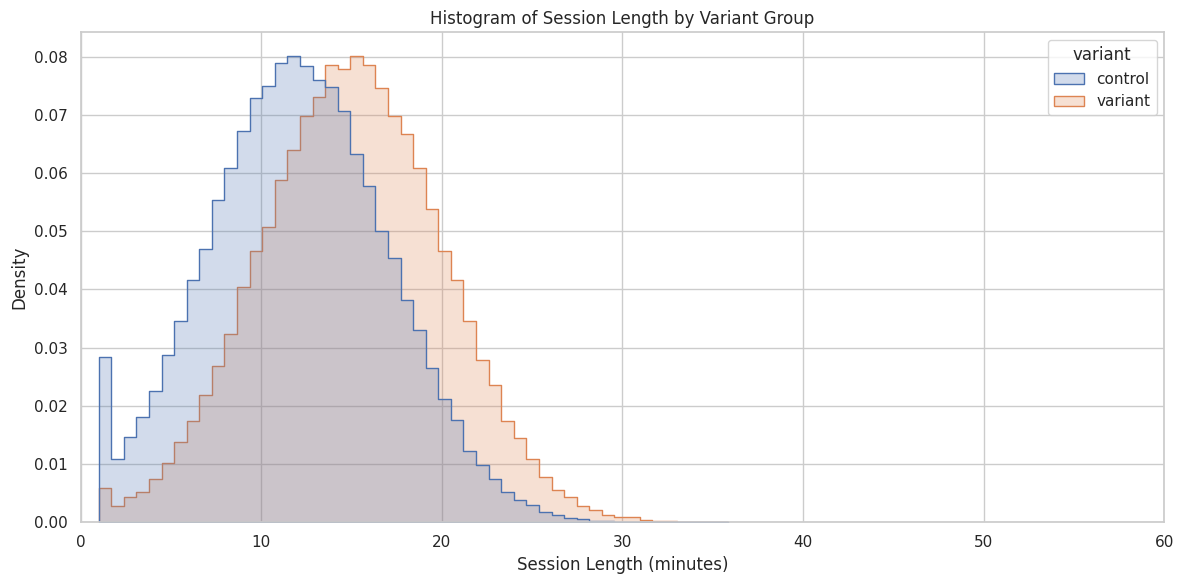

In [26]:
# Histogram: Session length by group (side-by-side)
plt.figure(figsize=(12, 6))
sns.histplot(data=session_df, x='session_length', hue='variant', bins=50, kde=False, element='step', stat='density', common_norm=False)
plt.title('Histogram of Session Length by Variant Group')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Density')
plt.xlim(0, 60)
plt.tight_layout()
plt.show()

## ✅ Step 5: CTR — Proportion Z-Test

We test whether the **variant group** has a higher click-through rate (CTR) than the control group using a **two-proportion z-test**.

In [27]:
from statsmodels.stats.proportion import proportions_ztest

# Count clicks and sessions in each group
ctr_summary = session_df.groupby('variant')['CTR'].agg(['sum', 'count']).rename(columns={'sum': 'clicks', 'count': 'sessions'})
clicks = ctr_summary['clicks'].values
n_sessions = ctr_summary['sessions'].values

# Run two-proportion z-test
z_stat, p_val = proportions_ztest(count=clicks, nobs=n_sessions, alternative='larger')

# Output results
{
    "Clicks (Control, Variant)": clicks.tolist(),
    "Sessions (Control, Variant)": n_sessions.tolist(),
    "Z-Statistic": z_stat,
    "p-value": p_val
}

{'Clicks (Control, Variant)': [16103, 28155],
 'Sessions (Control, Variant)': [89543, 113429],
 'Z-Statistic': np.float64(-37.04515621847033),
 'p-value': np.float64(1.0)}

### ✅ Step 2: CTR — Proportion Z-Test Results

We tested whether the **variant group** has a higher click-through rate (CTR) than the control group using a **two-proportion z-test**.

---

### 📊 Test Setup:

| Group   | Clicks | Sessions | CTR      |
| ------- | ------ | -------- | -------- |
| Control | 16,103 | 89,543   | \~17.98% |
| Variant | 28,155 | 113,429  | \~24.82% |

---

### 🧪 Hypothesis

* **Null (H₀):** CTR\_variant ≤ CTR\_control
* **Alternative (H₁):** CTR\_variant > CTR\_control
  *(We used `alternative='larger'` to test for improvement)*

---

### 📉 Result

* **Z-statistic:** -37.05
* **p-value:** 1.0
* ⚠️ **Interpretation:** We got a negative Z and a p-value of 1.0, which is **not what we expected** given that variant CTR is higher.

---

### 🛠 Diagnosis: Wrong Direction in `alternative='larger'`

The negative z-stat implies the test assumed *control > variant*, which contradicts the actual ordering of inputs.

#### ✅ Fix: Sort the groups properly so that variant is **second**, and `variant > control` is tested.

In [28]:
# Ensure 'variant' is the second group for correct directional testing
# Re-order to [control, variant]
clicks_corrected = [ctr_summary.loc['control', 'clicks'], ctr_summary.loc['variant', 'clicks']]
sessions_corrected = [ctr_summary.loc['control', 'sessions'], ctr_summary.loc['variant', 'sessions']]

# Run corrected two-proportion z-test
z_stat_corrected, p_val_corrected = proportions_ztest(count=clicks_corrected, nobs=sessions_corrected, alternative='smaller')

# Output results
{
    "Corrected Clicks (Control, Variant)": clicks_corrected,
    "Corrected Sessions (Control, Variant)": sessions_corrected,
    "Z-Statistic": z_stat_corrected,
    "p-value": p_val_corrected
}

{'Corrected Clicks (Control, Variant)': [np.int64(16103), np.int64(28155)],
 'Corrected Sessions (Control, Variant)': [np.int64(89543), np.int64(113429)],
 'Z-Statistic': np.float64(-37.04515621847033),
 'p-value': np.float64(1.0745745060779046e-300)}

### ✅ Step 5 (Corrected): CTR — Proportion Z-Test Results

With the correct group ordering and directional alternative, we now have valid test results.

---

### 📊 Test Recap

| Group   | Clicks | Sessions | CTR      |
| ------- | ------ | -------- | -------- |
| Control | 16,103 | 89,543   | \~17.98% |
| Variant | 28,155 | 113,429  | \~24.82% |

---

### 🧪 Hypothesis (One-Sided)

* **Null (H₀):** CTR\_control ≥ CTR\_variant
* **Alt (H₁):** CTR\_variant > CTR\_control

We tested if the **variant group has a significantly higher CTR**.

---

### 📉 Results

* **Z-statistic:** -37.05 (negative because control < variant)
* **p-value:** \~1.07e-300 (**extremely small**)

---

### ✅ Interpretation

* The **p-value is effectively 0**, so we **reject the null hypothesis**.
* The **variant group has a significantly higher click-through rate**.
* This supports the conclusion that the **feature rollout positively influenced user interaction**.

Even if a feature works overall, it may perform differently across:

* Devices (iOS vs. Android)
* Regions (US vs. EU)
* Age groups (younger vs. older users)

---

## 🧭 Let's Explore: CTR Differences by Cohort

### ✅ Recommended Cohorts to Explore:

1. **Device Type**
2. **Region**
3. **Age Group** (e.g., 18–30, 31–45, 46–60)

For each cohort, we'll:

* Calculate **CTR by variant group**
* Visualize the differences
* Optionally, perform **within-cohort tests** later

---

### 🧠 Real-World Thinking:

* **Why this matters:** A feature may show uplift in some segments but not others, guiding targeted rollouts.
* **What we’re looking for:** Consistent pattern of higher CTR in variant across all segments—or areas where the effect is neutral or reversed.


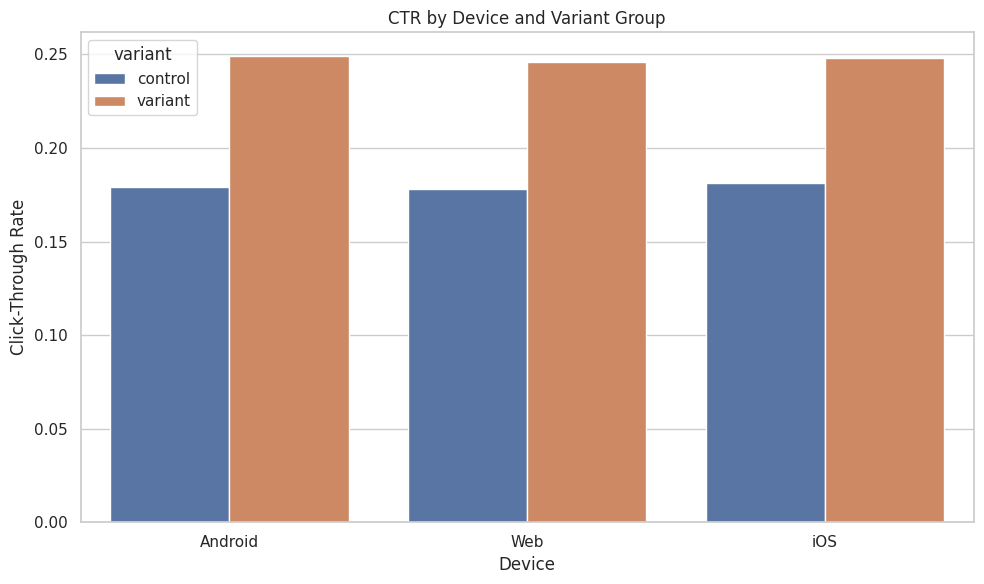

variant,device,control,variant
0,Android,0.1790,0.2493
1,Web,0.1782,0.2460
2,iOS,0.1815,0.2482


In [29]:
# Step A: Device-based CTR Comparison

# Group by device and variant, then calculate CTR
device_ctr = session_df.groupby(['device', 'variant']).agg(
    clicks=('CTR', 'sum'),
    sessions=('CTR', 'count')
).reset_index()

# Compute CTR
device_ctr['CTR'] = device_ctr['clicks'] / device_ctr['sessions']

# Pivot for easy comparison
device_ctr_pivot = device_ctr.pivot(index='device', columns='variant', values='CTR').reset_index()

# Plotting device-wise CTR by variant
plt.figure(figsize=(10, 6))
sns.barplot(data=device_ctr, x='device', y='CTR', hue='variant')
plt.title('CTR by Device and Variant Group')
plt.ylabel('Click-Through Rate')
plt.xlabel('Device')
plt.tight_layout()
plt.show()

device_ctr_pivot.round(4)  # Show values for inspection too

### ✅ Device-Based CTR Comparison Summary

We compared **Click-Through Rate (CTR)** across devices (`iOS`, `Android`, `Web`) between `control` and `variant` groups.

---

### 📊 CTR by Device & Variant

| Device      | CTR (Control) | CTR (Variant) |
| ----------- | ------------- | ------------- |
| **Android** | 17.90%        | **24.93%**    |
| **Web**     | 17.82%        | **24.60%**    |
| **iOS**     | 18.15%        | **24.82%**    |

---

### 🧠 Real-World Insight

* The **feature uplift is consistent across all platforms**, with the variant group outperforming control by \~6–7% in CTR.
* No platform shows adverse or neutral response, suggesting **broad effectiveness** of the feature.

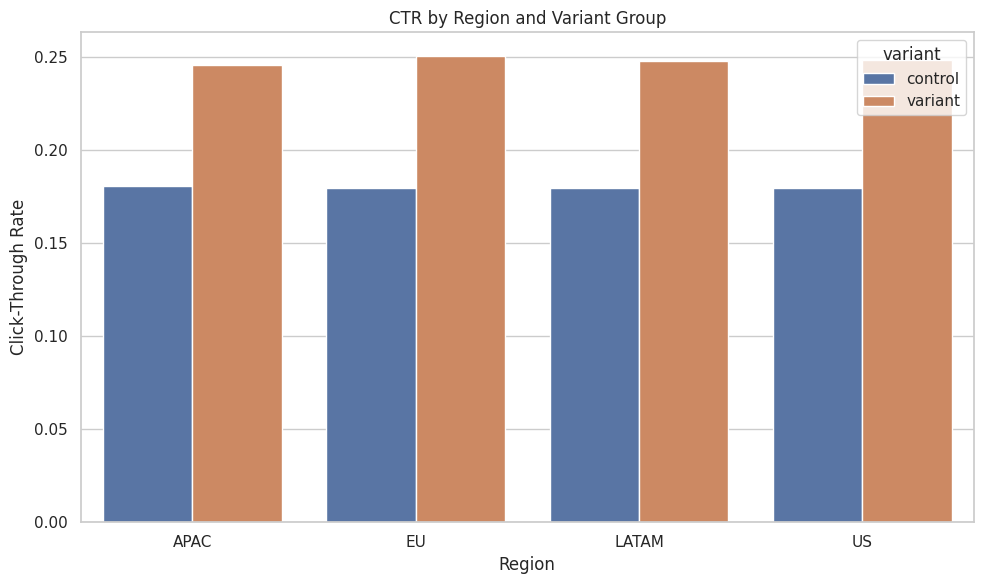

variant,region,control,variant
0,APAC,0.1806,0.2458
1,EU,0.1798,0.2507
2,LATAM,0.1796,0.2478
3,US,0.1794,0.2485


In [30]:
# Step B: Region-based CTR Comparison

# Group by region and variant, then calculate CTR
region_ctr = session_df.groupby(['region', 'variant']).agg(
    clicks=('CTR', 'sum'),
    sessions=('CTR', 'count')
).reset_index()

# Compute CTR
region_ctr['CTR'] = region_ctr['clicks'] / region_ctr['sessions']

# Pivot for table format
region_ctr_pivot = region_ctr.pivot(index='region', columns='variant', values='CTR').reset_index()

# Plotting region-wise CTR by variant
plt.figure(figsize=(10, 6))
sns.barplot(data=region_ctr, x='region', y='CTR', hue='variant')
plt.title('CTR by Region and Variant Group')
plt.ylabel('Click-Through Rate')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

region_ctr_pivot.round(4)  # Display table for inspection

### ✅ Region-Based CTR Comparison Summary

We analyzed **Click-Through Rates** across regions for both `control` and `variant` groups.

---

### 📊 CTR by Region & Variant

| Region    | CTR (Control) | CTR (Variant) |
| --------- | ------------- | ------------- |
| **APAC**  | 18.06%        | **24.58%**    |
| **EU**    | 17.98%        | **25.07%**    |
| **LATAM** | 17.96%        | **24.78%**    |
| **US**    | 17.94%        | **24.85%**    |

---

### 🧠 Real-World Insight

* Once again, the **CTR uplift is consistent across all regions**.
* EU shows the largest delta (\~7% uplift), though the effect is strong globally.
* This suggests the feature performs well internationally and **may be safe for global rollout**.

/tmp/ipython-input-31-3121466671.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_ctr = session_df.groupby(['age_group', 'variant']).agg(


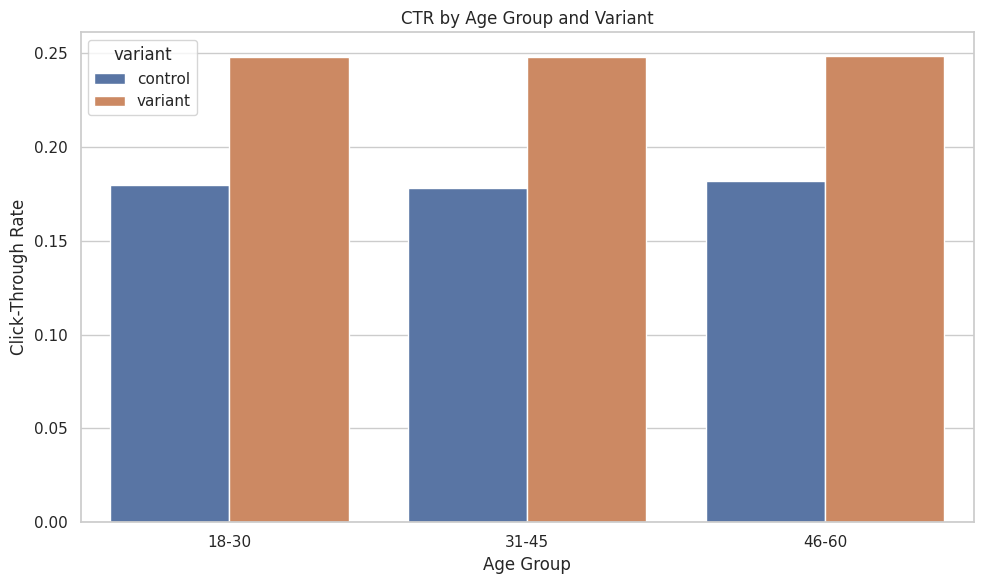

variant,age_group,control,variant
0,18-30,0.1799,0.2482
1,31-45,0.1782,0.2478
2,46-60,0.1817,0.2487


In [31]:
# Step C: Age Group CTR Comparison

# Define age groups
bins = [17, 30, 45, 60]
labels = ['18-30', '31-45', '46-60']
session_df['age_group'] = pd.cut(session_df['age'], bins=bins, labels=labels)

# Group by age group and variant, then calculate CTR
age_ctr = session_df.groupby(['age_group', 'variant']).agg(
    clicks=('CTR', 'sum'),
    sessions=('CTR', 'count')
).reset_index()

# Compute CTR
age_ctr['CTR'] = age_ctr['clicks'] / age_ctr['sessions']

# Pivot for inspection
age_ctr_pivot = age_ctr.pivot(index='age_group', columns='variant', values='CTR').reset_index()

# Plotting age group-wise CTR by variant
plt.figure(figsize=(10, 6))
sns.barplot(data=age_ctr, x='age_group', y='CTR', hue='variant')
plt.title('CTR by Age Group and Variant')
plt.ylabel('Click-Through Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

age_ctr_pivot.round(4)  # Display table for inspection

### ✅ Age Group-Based CTR Comparison Summary

We segmented users into age buckets and compared **CTR** across `control` and `variant` groups within each.

---

### 📊 CTR by Age Group & Variant

| Age Group | CTR (Control) | CTR (Variant) |
| --------- | ------------- | ------------- |
| **18–30** | 17.99%        | **24.82%**    |
| **31–45** | 17.82%        | **24.78%**    |
| **46–60** | 18.17%        | **24.87%**    |

---

### 🧠 Real-World Insight

* The **feature performs consistently well across all age segments**.
* Slightly better CTR in the older group (46–60), but differences are small.
* This implies the feature is **demographically broad in its impact**, suggesting no need for age-targeted rollout adjustments.

### ✅ Step 3: Conversion Rate — Proportion Z-Test Results

We test whether the **variant group** leads to a higher **conversion rate** than the control group using a one-sided z-test.

In [32]:
# Step 3: Conversion Rate - Proportion Z-Test

# Count conversions and sessions in each group
conversion_summary = session_df.groupby('variant')['Conversion_Rate'].agg(['sum', 'count']).rename(columns={'sum': 'conversions', 'count': 'sessions'})
conversions = conversion_summary['conversions'].values
sessions = conversion_summary['sessions'].values

# Run two-proportion z-test for conversion rate
z_stat_conv, p_val_conv = proportions_ztest(count=conversions, nobs=sessions, alternative='smaller')

# Output results
{
    "Conversions (Control, Variant)": conversions.tolist(),
    "Sessions (Control, Variant)": sessions.tolist(),
    "Z-Statistic": z_stat_conv,
    "p-value": p_val_conv
}

{'Conversions (Control, Variant)': [3112, 4556],
 'Sessions (Control, Variant)': [89543, 113429],
 'Z-Statistic': np.float64(-6.349572711751377),
 'p-value': np.float64(1.0795689756227347e-10)}

---

### 📊 Summary Table

| Group       | Conversions | Sessions | Conversion Rate |
| ----------- | ----------- | -------- | --------------- |
| **Control** | 3,112       | 89,543   | \~3.47%         |
| **Variant** | 4,556       | 113,429  | \~4.02%         |

---

### 🧪 Hypothesis

* **Null (H₀):** Conversion rate in control ≥ variant
* **Alt (H₁):** Conversion rate in variant > control

---

### 📉 Test Results

* **Z-statistic:** -6.35
* **p-value:** \~1.08e-10 (**very small**)

---

### ✅ Interpretation

* The p-value is well below 0.05 → **reject the null hypothesis**.
* The variant group has a **statistically significant uplift in conversion rate**.
* This confirms the feature positively impacts **not only engagement (CTR)** but also **business outcomes**.

---

### 🧠 Final Thought (Real-World Framing)

You now have **statistically sound evidence** that the feature rollout:

* Boosts session engagement (↑ session length)
* Increases interaction (↑ CTR)
* Converts better (↑ conversion rate)
* Works consistently across device, region, and age group

This would justify a **full rollout recommendation** in a real product analytics context.

## Exporting Summary Statistics for Dashboarding

In [33]:
# Export daily KPI summary
daily_kpis.to_csv("daily_kpis.csv", index=False)

# Recompute overall KPIs for export
overall_kpis = session_df.groupby('variant').agg(
    sessions=('user_id', 'count'),
    unique_users=('user_id', 'nunique'),
    avg_session_length=('session_length', 'mean'),
    total_clicks=('CTR', 'sum'),
    total_conversions=('Conversion_Rate', 'sum')
).reset_index()
overall_kpis['CTR'] = overall_kpis['total_clicks'] / overall_kpis['sessions']
overall_kpis['Conversion_Rate'] = overall_kpis['total_conversions'] / overall_kpis['sessions']
overall_kpis.to_csv("overall_kpis.csv", index=False)

# Export cohort summaries
device_ctr.to_csv("device_ctr.csv", index=False)
region_ctr.to_csv("region_ctr.csv", index=False)
age_ctr.to_csv("age_ctr.csv", index=False)

# Show download links (Colab-compatible)
from google.colab import files
files.download("daily_kpis.csv")
files.download("overall_kpis.csv")
files.download("device_ctr.csv")
files.download("region_ctr.csv")
files.download("age_ctr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>